<a href="https://colab.research.google.com/github/vimalT123/prodigy_ml_01/blob/main/prodigy_ml_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_csv('/content/data.csv', encoding='utf-8')
df


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014 00:00,3.130000e+05,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 00:00,2.384000e+06,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-2014 00:00,3.420000e+05,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-2014 00:00,4.200000e+05,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-2014 00:00,5.500000e+05,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,09-07-2014 00:00,3.081667e+05,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,09-07-2014 00:00,5.343333e+05,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,09-07-2014 00:00,4.169042e+05,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,10-07-2014 00:00,2.034000e+05,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [5]:
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014 00:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 00:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-2014 00:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-2014 00:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-2014 00:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [6]:
print(df.describe())

              price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
mean   5.519630e+05     3.400870     2.160815   2139.346957  1.485252e+04   
std    5.638347e+05     0.908848     0.783781    963.206916  3.588444e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.228750e+05     3.000000     1.750000   1460.000000  5.000750e+03   
50%    4.609435e+05     3.000000     2.250000   1980.000000  7.683000e+03   
75%    6.549625e+05     4.000000     2.500000   2620.000000  1.100125e+04   
max    2.659000e+07     9.000000     8.000000  13540.000000  1.074218e+06   

            floors   waterfront         view    condition   sqft_above  \
count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
mean      1.512065     0.007174     0.240652     3.451739  1827.265435   
std       0.538288     0.084404     0.778405     0.677230   862.168977   
min       

In [7]:
print(df.isnull().sum())

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


In [8]:
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition']]
y = df['price']


from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=101)
from sklearn.linear_model import LinearRegression


model = LinearRegression()


model.fit(X_train, y_train)

LinearRegression()

In [9]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,-41596.520771
bathrooms,-9502.889329
sqft_living,271.900532
sqft_lot,-0.694717
floors,41402.156749
waterfront,232217.070005
view,58557.878819
condition,53350.328263


In [10]:

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 530193091236.19495
R-squared: 0.1028541295428651


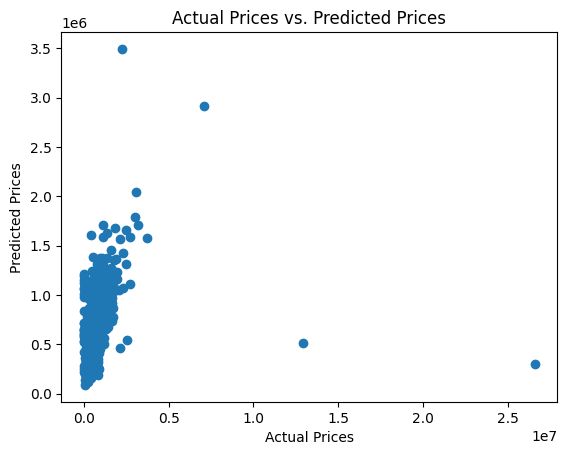

In [11]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

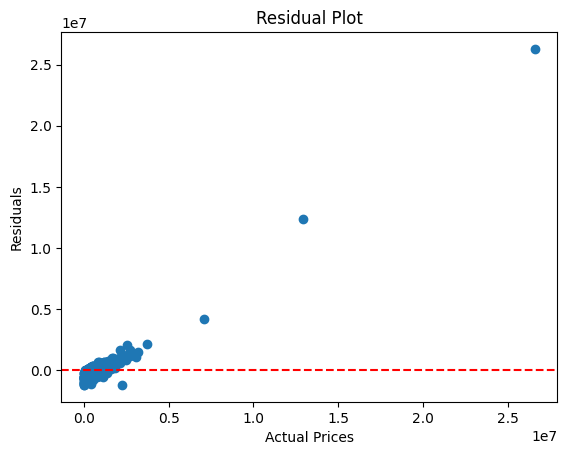

In [12]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [13]:
new_data = [[3, 2, 1500, 4000, 1, 0, 0, 3]]
predicted_price = model.predict(new_data)
print("Predicted Price:", predicted_price[0])


Predicted Price: 338776.90576971904


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
